# Clustering Analysis with K-Means

### Breast Cancer Dataset: 

<p>This Dataset has a number of variables with descriptions of breast-cancer tumors, and also a label for every observation saying if the Tumor was Malign or Benign, we'll do some quick analysis, select some variables, and run a K-Means Algorithm to see how well we can separate Malign from Benign Items</p>

#### 1. Importing Liraries

In [233]:
import pandas as pd 
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#### 2. Reading Data

In [234]:
path = "datasets/breast_cancer.csv"
df = pd.read_csv(path)



#### 3.First Look and Clean

In [235]:
# see variable names
print(f"variable names: {df.columns}")

variable names: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [236]:
# taking a first look at the raw data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [237]:
# "id", and "unnamed: 32" chould be dropped since they're not necessary
df.drop(["Unnamed: 32","id"], axis=1, inplace=True) # Axis = 1 is needed to tell python to use columns

## Let's separate the X Variables from the Y Label before doing some exploratory visualizations
y = df["diagnosis"]
data = df.drop("diagnosis", axis = 1)

#### Exploratory Visualizations

Number of Malign is 212, and number of Benign is 357 


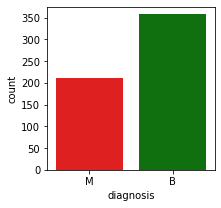

In [238]:
plt.figure(figsize=(3,3))
ax = sns.countplot(y, label="# of Observations", palette=["red","green"])
values = y.value_counts()
print(f'Number of Malign is {values["M"]}, and number of Benign is {values["B"]} ')


In [239]:
# Standardize Data
data = (data - data.mean()) / (data.std())
data_std = data
# Concatenate X and Y
data = pd.concat([y,data], axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

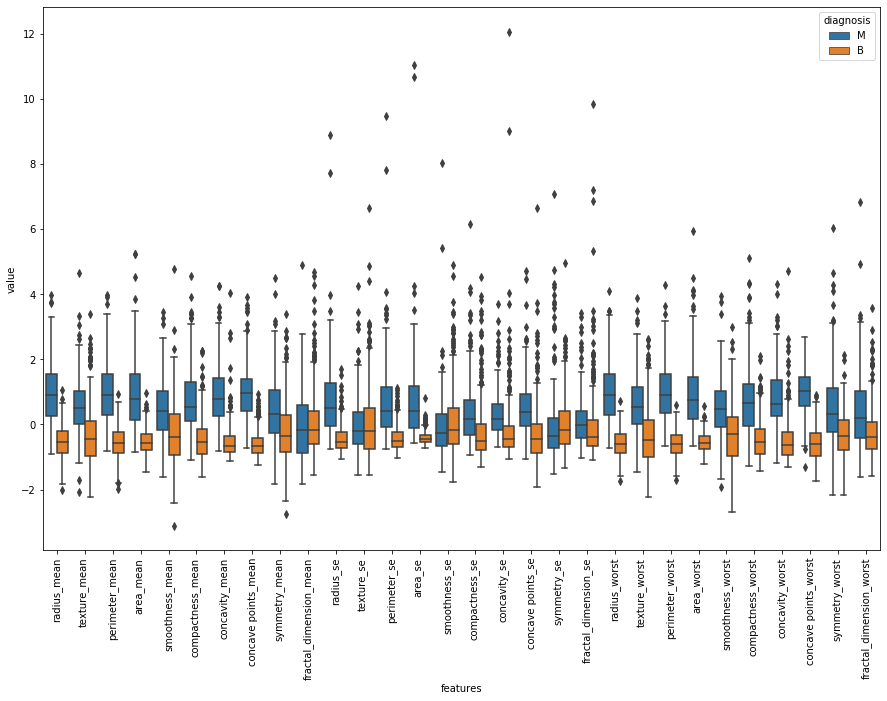

In [240]:
# Do Boxplots to help select which variables we're going to use in the K-Means
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

#### 6. Applying K-Means for Top 2 Variables

Results from Original Dataset vs Clustered Results:
Original Dataset: Benign:357       Malign: 212
Clustered Results: Benign:417       Malign: 152

Our results are failing to capture around 60(28%) out of 212 Malign Tumors, which is very bad!


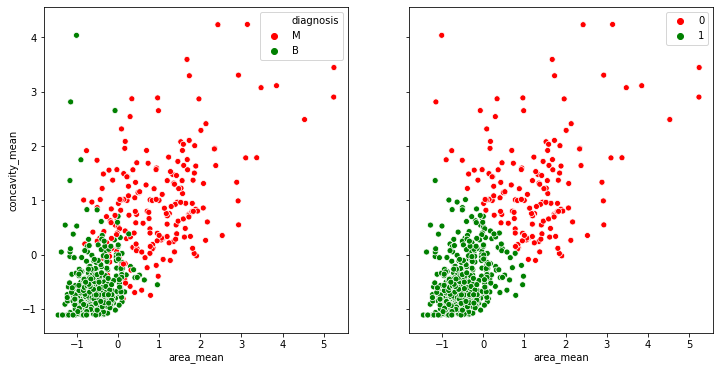

In [281]:
X = data_std[['area_mean','concavity_mean']]


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X) # 1 is standing for benign here
cluster_benign= np.count_nonzero(pred_y == 1, axis = 0)
cluster_malign= np.count_nonzero(pred_y == 0, axis = 0)

# Plotting Results
fig,(ax1, ax2) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(12,6))

sns.scatterplot(x = X["area_mean"], y = X["concavity_mean"], hue=df.diagnosis, ax=ax1, palette=["red","green"])
sns.scatterplot(x = X["area_mean"], y = X["concavity_mean"], hue=pred_y, palette=["red","green"])

print(f'Results from Original Dataset vs Clustered Results:') 
print(f'Original Dataset: Benign:{values["B"]}       Malign: {values["M"]}') 
print(f'Clustered Results: Benign:{cluster_benign}       Malign: {cluster_malign}') 
print(f'\nOur results are failing to capture around 60(28%) out of 212 Malign Tumors, which is very bad!')
